In [2]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

In [3]:
kernel = np.ones((3,3), dtype=np.uint8)/9
# 5x5 7x7 11x11
kernel

array([[0.11111111, 0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111]])

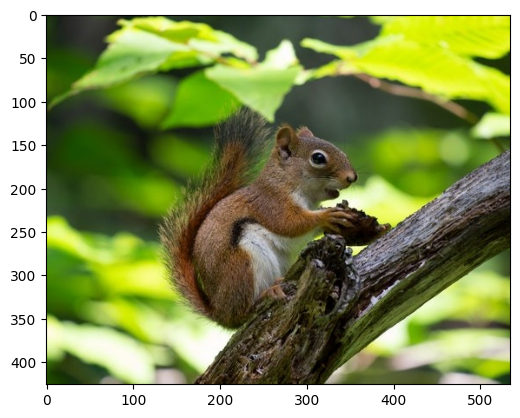

In [4]:
img = cv.imread("images/squirrel_cls.jpg")[:,:,::-1]
plt.imshow(img, cmap="gray")

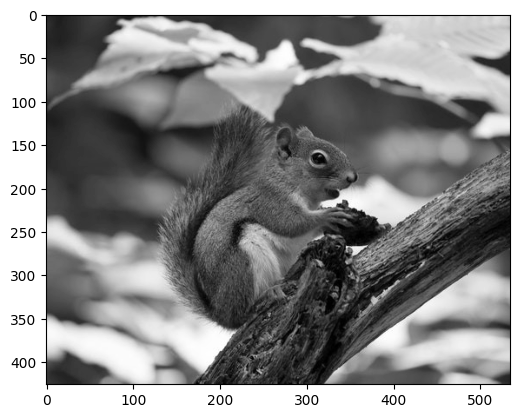

In [5]:
img_grey = cv.cvtColor(img, cv.COLOR_RGB2GRAY)
plt.imshow(img_grey, cmap="gray")

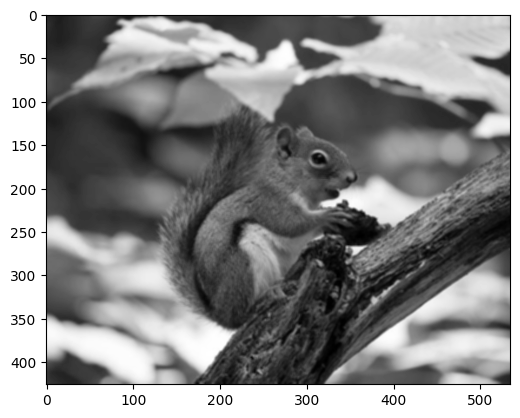

In [6]:
 img_smoothed = cv.filter2D(img_grey, -1, kernel)
 plt.imshow(img_smoothed, cmap="gray")

In [7]:
def make_sqare_kernels(n: int):
   return np.ones((n,n))/(n*n) 

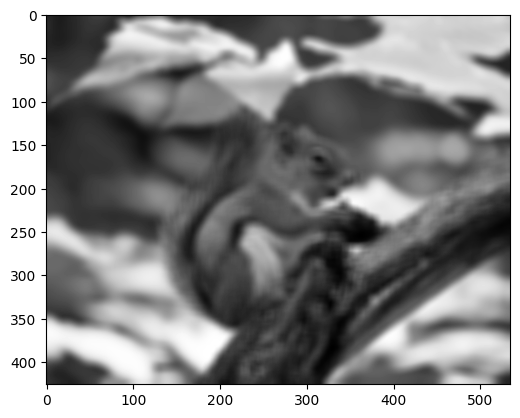

In [8]:
kernel11 = make_sqare_kernels(11)
img_smoothed = cv.filter2D(img_grey, -1, kernel11)
plt.imshow(img_smoothed, cmap="gray")

# Gaussian Kernel

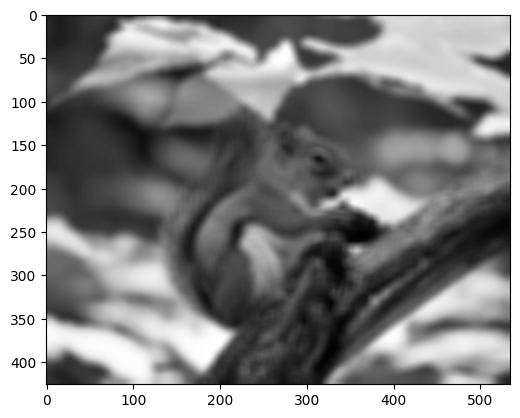

In [14]:
img_gaussian = cv.GaussianBlur(img_grey, (11, 11), 100)
plt.imshow(img_gaussian, cmap="gray")